In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LinearRegression

geo = "GSE27486"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Patnaik2012", silent=True)

In [3]:
data.metadata["platform_id"][0]

'GPL11432'

In [4]:
data.gpls[data.metadata["platform_id"][0]].table

,ID,name,accession,miRNA_LIST,SEQUENCE,database,SPOT_ID
0,10916,hsa-miR-1/mmu-miR-1,MIMAT0000416/MIMAT0000123,hsa-miR-1/mmu-miR-1,UGGAAUGUAAAGAAGUAUGUAU,miRBase 14.0,NaN
1,10998,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,MIMAT0000074/MIMAT0000513/MIMAT0000788,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,UGUGCAAAUCCAUGCAAAACUGA,miRBase 14.0,NaN
2,42918,hsa-miR-19b-2*,MIMAT0004492,hsa-miR-19b-2*,AGUUUUGCAGGUUUGCAUUUCA,miRBase 14.0,NaN
3,17883,hsa-miR-19b-1*,MIMAT0004491,hsa-miR-19b-1*,AGUUUUGCAGGUUUGCAUCCAGC,miRBase 14.0,NaN
4,10997,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,MIMAT0000073/MIMAT0000651/MIMAT0000789,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,UGUGCAAAUCUAUGCAAAACUGA,miRBase 14.0,NaN
...,...,...,...,...,...,...,...
2024,146204,-,NaN,NaN,NaN,NaN,146204
2025,42860,-,NaN,NaN,NaN,NaN,42860
2026,4040,-,NaN,NaN,NaN,NaN,4040
2027,146210,-,NaN,NaN,NaN,NaN,146210


In [5]:
list(data.gsms.values())[0].metadata

{'title': ['lung_adenocarcinoma_1'],
 'geo_accession': ['GSM679368'],
 'status': ['Public on May 20 2011'],
 'submission_date': ['Feb 24 2011'],
 'last_update_date': ['May 20 2011'],
 'type': ['RNA'],
 'channel_count': ['2'],
 'source_name_ch1': ['Lung adenocarcinoma case ID 1'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Female',
  'age: 76 y',
  'tissue: Lung adenocarcinoma',
  'disease: Lung adenocarcinoma'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from blood collected and stored in PAXgene Blood RNA tubes using a PAXgene Blood RNA isolation kit at the University of Pennsylvania as per the protocol suggested by the manufacturer (QiagenÂ®, Valencia, CA, USA). The human universal reference RNA was made by pooling contents of FirstChoice total RNA panel that is made of RNA from different tissues of multiple individuals (AmbionÂ®, Austin, TX, USA; catalog no. AM6000.'],
 'label_ch1': ['Hy3'],
 'l

In [6]:
table = pd.concat((val.table.iloc[:,1:2] for val in data.gsms.values()), axis=1).transpose()

In [10]:
#table = table.loc[:, (table > 0).all(0)]
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_7796/3290136690.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [11]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
VALUE,-0.121811,0.681523,-0.278424,1.022933,-1.339246,-1.707187,0.224305,-1.029435,-1.895646,0.036548,...,2.580954,-0.657848,-0.020885,-0.329779,-2.630664,2.295395,-0.308364,0.206460,1.869079,0.182939
VALUE,-0.618272,0.968333,-0.047769,0.992508,-0.885852,-1.833941,0.099629,-0.952269,-1.355567,0.080132,...,3.030934,-0.824794,0.028160,-0.298583,-2.428550,2.702078,-0.267518,0.367792,1.185955,0.063379
VALUE,-0.371160,0.539894,-0.263893,0.968399,-0.109677,-1.938270,0.383531,-0.860962,-1.614382,0.099028,...,3.041195,-0.738480,-0.069795,-0.322930,-2.660806,2.856584,-0.154032,0.382982,0.911585,0.107294
VALUE,-0.545492,0.088346,-0.412304,0.784207,0.791398,-1.041545,0.626381,-0.957148,-0.406542,0.147417,...,4.764078,-0.676830,0.717817,-0.021230,-2.549759,4.531142,0.165427,0.828675,1.674162,-0.008375
VALUE,-0.669354,1.035114,-0.095419,0.948915,-1.700610,-1.163883,0.280384,-1.094740,-1.028080,0.022821,...,2.702192,-0.951415,0.095480,-0.398614,-2.167204,2.303261,-0.473805,0.107087,1.476674,0.382402


In [12]:
np.mean(table)

0      -0.470605
1       0.455437
2      -0.251423
3       0.995960
4      -0.622546
          ...   
2021    3.197722
2022   -0.466500
2023    0.306423
2024    1.476855
2025    0.045873
Length: 2026, dtype: float64

In [13]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [14]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

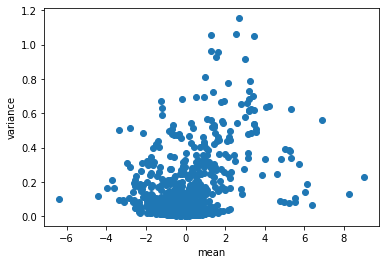

In [15]:
mean_variance_plot(table)

### Trying log-transformation

In [16]:
log_table = table#np.log2(table)

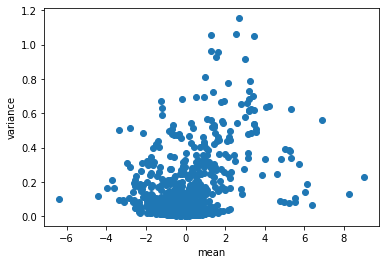

In [17]:
mean_variance_plot(log_table)

In [18]:
norm_log_table = log_table - np.mean(log_table)
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

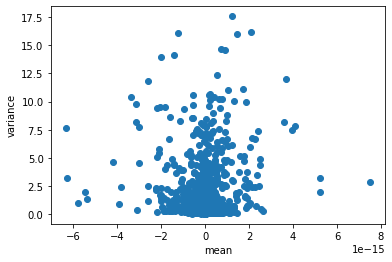

In [19]:
mean_variance_plot(norm_log_table)

In [20]:
pca = decomposition.PCA(n_components=2)

In [21]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [22]:
components = pca.transform(norm_log_table)

In [23]:
components

array([[ 1.26125255e+01, -1.99199850e+01],
       [ 8.47446819e+00,  8.83870571e+00],
       [ 2.97073209e+00,  1.33023621e+01],
       [-4.16189797e+01,  2.70804989e+01],
       [ 2.20664711e+01,  1.38114968e+01],
       [ 2.02350940e+01,  4.65792755e+00],
       [ 2.88165499e+01,  1.28679548e+01],
       [-1.32469000e+01,  2.43379699e+01],
       [ 4.50938232e+01, -1.51892606e+01],
       [ 5.81336680e+01,  4.54936029e-02],
       [ 1.47288672e+01, -1.12775106e+01],
       [ 3.43984557e+01, -1.28245485e+01],
       [-2.21450685e+01, -8.30909562e+00],
       [ 2.18542353e+00, -3.12590875e+01],
       [ 4.02919702e+01, -1.99372949e+01],
       [ 9.54548731e+00,  9.10109618e+00],
       [-2.13546604e+01,  6.18614362e+00],
       [-1.32355594e+01, -1.16103438e+01],
       [-9.84184308e+00, -3.45585809e+01],
       [ 2.77246902e+01, -3.16793965e+00],
       [-1.11632637e+01, -1.36744018e+01],
       [ 4.98876693e+01,  8.58056591e+00],
       [ 5.16953098e+01,  4.05378058e+01],
       [ 1.

In [24]:
list(data.gsms.values())[-1].metadata

{'title': ['no_cancer_49'],
 'geo_accession': ['GSM679412'],
 'status': ['Public on May 20 2011'],
 'submission_date': ['Feb 24 2011'],
 'last_update_date': ['May 20 2011'],
 'type': ['RNA'],
 'channel_count': ['2'],
 'source_name_ch1': ['No cancer control ID 49'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age: 53 y',
  'tissue: Normal lung',
  'disease: No cancer'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from blood collected and stored in PAXgene Blood RNA tubes using a PAXgene Blood RNA isolation kit at the University of Pennsylvania as per the protocol suggested by the manufacturer (QiagenÂ®, Valencia, CA, USA). The human universal reference RNA was made by pooling contents of FirstChoice total RNA panel that is made of RNA from different tissues of multiple individuals (AmbionÂ®, Austin, TX, USA; catalog no. AM6000.'],
 'label_ch1': ['Hy3'],
 'label_protocol_ch1': ['RNA was label

In [25]:
controls = np.array(["no_cancer" in k.metadata["title"][0] for k in list(data.gsms.values())])

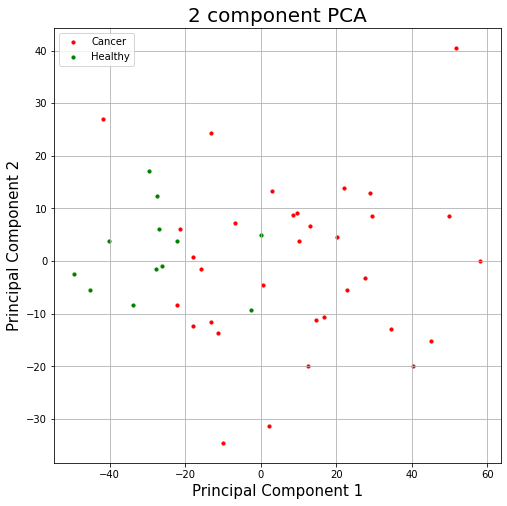

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

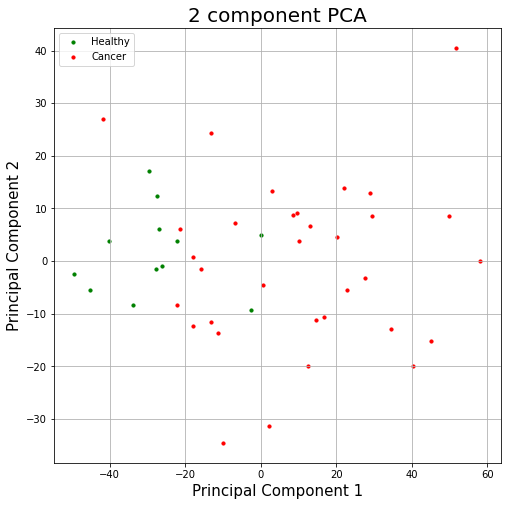

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [28]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values()) if "post" not in k.metadata["characteristics_ch1"][0]])

In [29]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [30]:
covars = covars.fillna(covars.mean())

In [35]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [36]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [37]:
pca = decomposition.PCA(n_components=2)

In [38]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [39]:
components = pca.transform(adj_norm_log_table)

In [40]:
components

array([[-15.19569621, -15.55787564],
       [ 10.13339397,   6.55112077],
       [  8.51891175,  12.31770003],
       [-33.91648211,  28.71615369],
       [ 42.67513145,   7.12434387],
       [ -0.69358963,   6.66635809],
       [ 19.50706905,  10.45007867],
       [-15.41140435,  24.93110232],
       [ 20.53102002, -11.98834687],
       [ 39.29032014,   1.08951758],
       [-11.00571218,  -7.79582803],
       [ 23.31792174, -16.83199464],
       [-20.55939669,  -8.27615253],
       [-13.05882389, -27.55020329],
       [ 21.29852932, -19.05943128],
       [ 14.9007876 ,   8.37654813],
       [-17.39454733,   5.09225388],
       [-32.09825643,  -6.22660559],
       [ -0.55294276, -36.54873206],
       [ 23.53793062,  -6.58929567],
       [-10.88264119, -14.04077946],
       [ 33.20564823,   9.3843823 ],
       [ 45.65300036,  39.41010247],
       [ 49.82966735,  -1.38169154],
       [  7.95726891,  10.22686554],
       [ 20.90184301,  -5.95492104],
       [ -8.80035715,  -2.51104239],
 

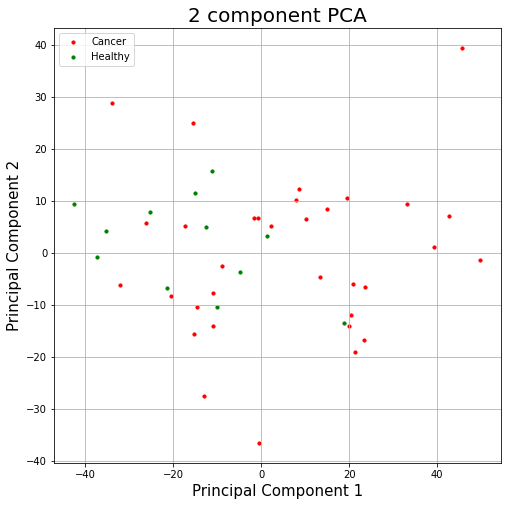

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Export data

In [43]:
lookup_table = data.gpls[data.metadata["platform_id"][0]].table

In [44]:
lookup_table = lookup_table.set_index("ID")

In [45]:
lookup_table.head()

,name,accession,miRNA_LIST,SEQUENCE,database,SPOT_ID
ID,,,,,,
10916,hsa-miR-1/mmu-miR-1,MIMAT0000416/MIMAT0000123,hsa-miR-1/mmu-miR-1,UGGAAUGUAAAGAAGUAUGUAU,miRBase 14.0,NaN
10998,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,MIMAT0000074/MIMAT0000513/MIMAT0000788,hsa-miR-19b/mmu-miR-19b/rno-miR-19b,UGUGCAAAUCCAUGCAAAACUGA,miRBase 14.0,NaN
42918,hsa-miR-19b-2*,MIMAT0004492,hsa-miR-19b-2*,AGUUUUGCAGGUUUGCAUUUCA,miRBase 14.0,NaN
17883,hsa-miR-19b-1*,MIMAT0004491,hsa-miR-19b-1*,AGUUUUGCAGGUUUGCAUCCAGC,miRBase 14.0,NaN
10997,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,MIMAT0000073/MIMAT0000651/MIMAT0000789,hsa-miR-19a/mmu-miR-19a/rno-miR-19a,UGUGCAAAUCUAUGCAAAACUGA,miRBase 14.0,NaN


In [46]:
mirnas = list(data.gsms.values())[0].table.iloc[:, 0]

In [47]:
sequences = lookup_table.loc[mirnas]["SEQUENCE"]

In [48]:
mask = np.array([set(str(s)).issubset(set("ACGU")) for s in sequences])
sequences = sequences[mask]
adj_norm_log_table = adj_norm_log_table.loc[:, mask]

In [49]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = 1-controls
adj_norm_log_table.head()

SEQUENCE,UGGAAGACUUGUGAUUUUGUUGU,UCGUACCGUGAGUAAUAAUGCG,CAGUGGUUUUACCCUAUGGUAG,UCAAAUGCUCAGACUCCUGUGGU,AUAAGACGAGCAAAAAGCUUGU,UAGCUUAUCAGACUGAUGUUGA,UGAGGUAGUAGUUUGUGCUGUU,CAGUGCAAUGUUAAAAGGGCAU,UGGAAUGUAAAGAAGUAUGUAU,AGCAGCAUUGUACAGGGCUAUGA,...,AAGGGAACGGGCUUGGCGGAAU,AGAGGUCUUGGGGCCGAAAC,UGAGGUAGUAGUUAGAA,UGGUUGUAGUCCGUGCGAGAAUA,AGACCUACUUAUCUACCAACAGC,AAAGGGGUCUGCAACCAAAGG,AUAGUUGUGUGUGGAUGUGUGU,CUUCCGCCCGGCCGGGUGUCG,AGCUUCUUUACAGUGCUGCCUUG,cancer
VALUE,-0.037828,-0.860290,-0.759881,-0.246837,0.008769,-2.336226,-1.464087,0.706377,-3.421661,-0.091375,...,0.465624,0.172977,0.991664,2.111226,0.737761,0.786151,0.185192,-0.465756,2.310088,1
VALUE,-0.093803,-0.948459,-1.746458,-0.548351,0.221348,-1.229038,-1.900802,-0.696585,-1.006187,-1.331603,...,0.286950,1.032347,-0.753197,-1.117073,-1.196173,1.796282,0.404448,0.102461,-1.223892,1
VALUE,-0.140834,1.687281,-2.494838,0.590747,0.617186,-2.511191,2.503869,-2.884745,-1.780356,-1.369467,...,-0.352390,-0.236590,3.171035,5.387584,-3.257894,0.408925,1.020685,0.209456,-2.423845,1
VALUE,-0.847895,5.105468,0.919402,1.546277,0.251687,2.134487,5.459467,1.153813,-1.346315,2.193798,...,0.598148,1.956676,4.637716,-1.959215,0.201063,-0.433095,2.310737,1.960744,0.519878,1
VALUE,-0.087471,-5.603191,-0.411101,0.273858,-0.186522,-0.971383,-5.429882,-4.195499,4.552361,-2.090615,...,-0.029141,-0.387285,-6.685353,-2.751566,-3.781472,0.583766,0.249444,-0.736023,-0.573840,1


In [50]:
adj_norm_log_table.to_csv("../TransformedData/Patnaik2012.csv", index=False)